In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
df = pd.read_csv('APPA_data_merged.csv')
df.Data = pd.to_datetime(df.Data)

In [31]:
data_start = datetime.datetime(2021, 1, 28, 0, 0, 0)
data_end = datetime.datetime(2021, 1, 29, 0, 0, 0)

In [4]:
def subdf(df, pollutant, station):

    start = data_start
    end = data_end

    mask = (df.Inquinante == pollutant) & (df.Stazione == station) & (df.Data >= start) & (df.Data <= end)
    subdf = df[mask]

    return subdf

In [5]:
def compress_data(df, resample_rule):
    df_mean = df.resample(resample_rule, on='Data').mean()
    df_mean = df_mean.reset_index()
    return df_mean

In [24]:
def plot_ewm(df, ax, alpha):

    import matplotlib.dates as mdates

    df_smooth = df.Valore.ewm(alpha=alpha).mean()
    
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    

    ax.plot(df.Data, df.Valore, linewidth=1, color="blue")  # normal
    ax.plot(df.Data, np.full(df.shape[0], df.Valore.mean()), ls="--", color="black", linewidth=3)  # average dotted line
    #ax.plot(df.Data, df_smooth, color="#ff0000", linewidth=3)  # smoothed
    
    ax.legend(["Value", "Mean", "Smoothed"])
    ax.grid(alpha=1, color="#ffffff")

In [7]:
stations = ['Monte Gaza', 'Riva del Garda', 'Parco S. Chiara', 'Piana Rotaliana', 'Rovereto', 'Via Bolzano', 'A22 (Avio)', 'Borgo Valsugana']
threshold = {'PM10': [36, 50], 
             'Biossido di Azoto': [101, 200], 
             'Ozono': [121, 180], 
             'PM2.5': [201, 350], 
             'Ossido di Carbonio': [7.6, 10], 
             'Biossido Zolfo': [201, 350]}

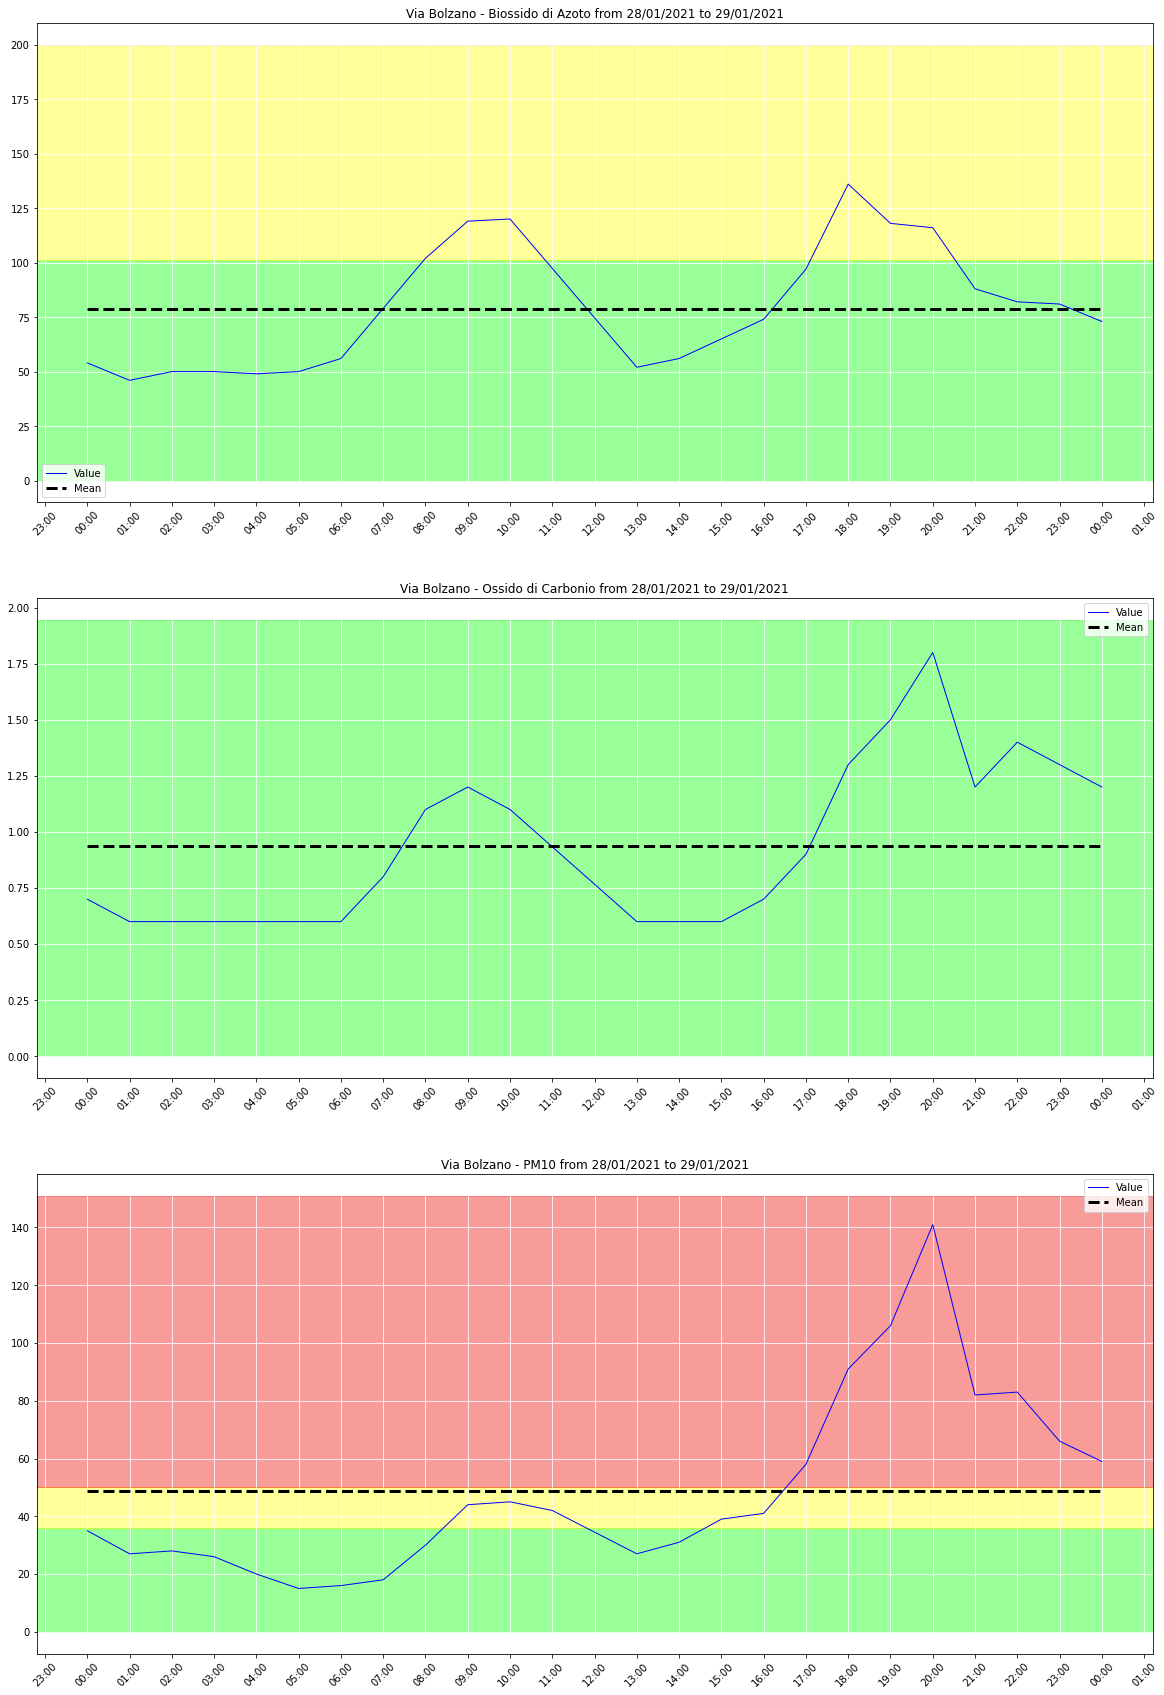

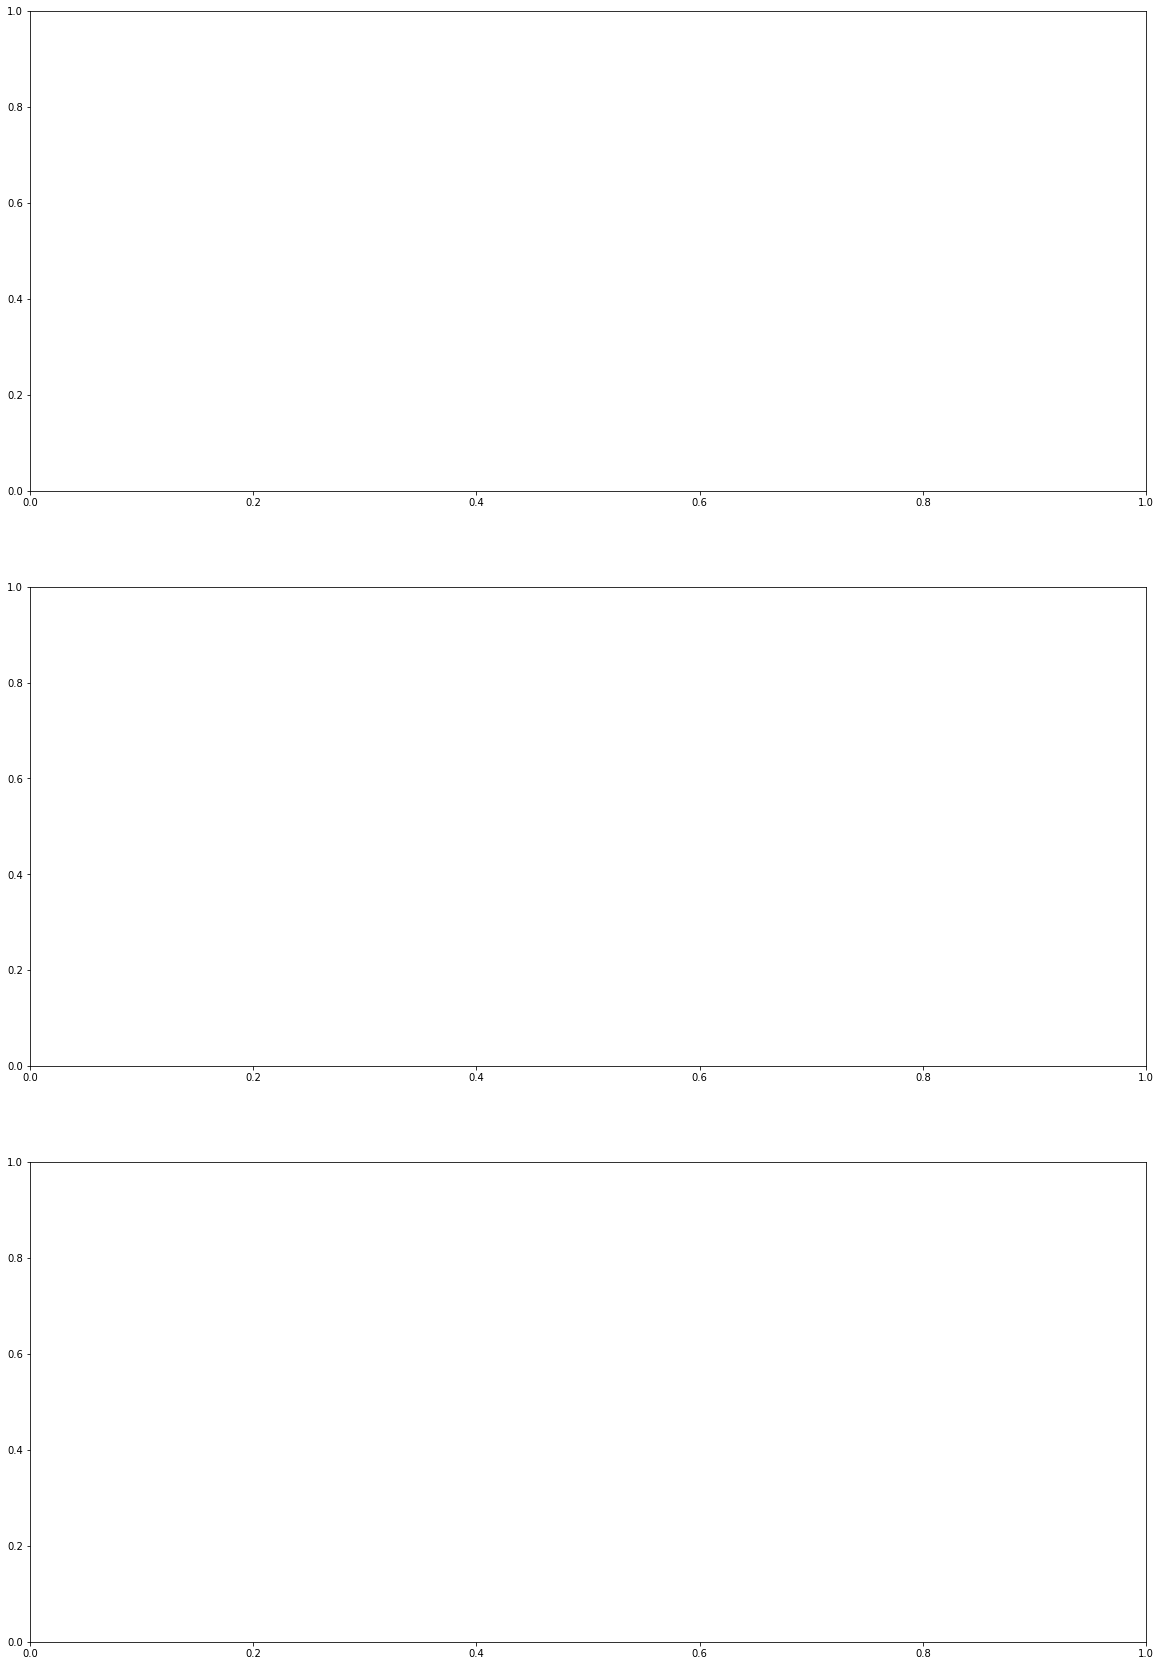

In [32]:
stations = ["Via Bolzano", "A22 (Avio)"]

for i, station in enumerate(stations):
    pollutants = df[df.Stazione == station].Inquinante.unique()
    fig, ax = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(20, 10*len(pollutants)))
    for j, pollutant in enumerate(pollutants):
        df_pollutant_station = subdf(df, pollutant, station)
        if df_pollutant_station.shape[0] > 2:

            new_df_compressed = df_pollutant_station
            #new_df_compressed = compress_data(df_pollutant_station, 'D')

            

            plot_ewm(new_df_compressed, ax[j], 0.01652)
            ax[j].title.set_text(f"{station} - {pollutant} from {data_start.strftime('%d/%m/%Y')} to {data_end.strftime('%d/%m/%Y')}")

            only_green = new_df_compressed.Valore.max() < threshold[pollutant][0]
            y_max_green = min(new_df_compressed.Valore.max(), threshold[pollutant][0])
            y_max_green *= 1.08 if only_green else 1  # adds some space at the top if there is only green
            ax[j].axhspan(0, y_max_green, color='#00ff00', alpha=0.4, zorder=-100)

            if not only_green:
                ax[j].axhspan(threshold[pollutant][0], threshold[pollutant][1], color='#ff0', alpha=0.4, zorder=-100)
                ax[j].axhspan(threshold[pollutant][1]+.001, max(new_df_compressed.Valore.max()+10, threshold[pollutant][1]), color='#ed0800', alpha=0.4, zorder=-100)


In [ ]:

"""
for i, station in enumerate(stations):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
    df_correlation = no2_ozone_correlation(df, station)
    for j in range(2):
        df_compressed = compress_data(df_correlation, 'D')
        ax[j].title.set_text(f"{station} - Ozone and NO2 - daily mean - 120 day moving average span")
        plot_ewm(df_compressed, ax[j], 120)

        not_only_green = df_compressed.Valore.max() > threshold[pollutant][0]
        y_max_green = min(df_compressed.Valore.max(), threshold[pollutant][0])
        y_max_green *= 1.08 if not not_only_green else 1  # adds some space at the top if there is only green
        ax[j].axhspan(0, y_max_green, color='#00ff00', alpha=0.7, zorder=-100)

        if not_only_green:
            ax[j].axhspan(threshold[pollutant][0], threshold[pollutant][1], color='#f1c40f', alpha=0.7, zorder=-100)
            ax[j].axhspan(threshold[pollutant][1]+.001, max(df_compressed.Valore.max()+10, threshold[pollutant][1]), color='#ed0800', alpha=0.7, zorder=-100)
"""



In [ ]:
co_avio = df[(df.Inquinante == "Ossido di Carbonio") &
(df.Stazione == "A22 (Avio)")]

In [ ]:
import datetime
start = datetime.datetime(2020, 4, 30, 0, 0, 0)
end = datetime.datetime(2020, 4, 30, 23, 0, 0)

rainy_day_co_avio = co_avio[(start <= co_avio.Data) & (co_avio.Data <= end)]

In [ ]:
plt.plot(rainy_day_co_avio.Data, rainy_day_co_avio.Valore)

In [ ]:
start = datetime.datetime(2020, 1, 1, 0, 0, 0)
end = datetime.datetime(2020, 12, 30, 23, 0, 0)

not_rainy_day_co_avio = co_avio[(start <= co_avio.Data) & (co_avio.Data <= end)]

In [ ]:
plt.plot(not_rainy_day_co_avio.Data, not_rainy_day_co_avio.Valore)

In [ ]:
co_via_bolzano = df[(df.Inquinante == "Ossido di Carbonio") &
                            (df.Stazione == "Via Bolzano")
                    ] 

In [ ]:
start = datetime.datetime(2020, 4, 28, 0, 0, 0)
end = datetime.datetime(2020, 4, 28, 23, 0, 0)
not_rainy_day_co_via_bolzano = co_via_bolzano[(start <= co_via_bolzano.Data) & (co_via_bolzano.Data <= end)]

start = datetime.datetime(2020, 4, 29, 0, 0, 0)
end = datetime.datetime(2020, 4, 29, 23, 0, 0)
rainy_day_co_via_bolzano = co_via_bolzano[(start <= co_via_bolzano.Data) & (co_via_bolzano.Data <= end)]

In [ ]:
plt.xticks(rotation = 45)
plt.plot(not_rainy_day_co_via_bolzano.Data, not_rainy_day_co_via_bolzano.Valore)
plt.plot(rainy_day_co_via_bolzano.Data, rainy_day_co_via_bolzano.Valore)

In [ ]:
start = datetime.datetime(2021, 6, 1, 0, 0, 0)
end = datetime.datetime(2021, 7, 1, 0, 0, 0)
not_rainy_month_co_via_bolzano = co_via_bolzano[(start <= co_via_bolzano.Data) & (co_via_bolzano.Data <= end)]

start = datetime.datetime(2021, 7, 1, 0, 0, 0)
end = datetime.datetime(2021, 8, 1, 0, 0, 0)
rainy_month_co_via_bolzano = co_via_bolzano[(start <= co_via_bolzano.Data) & (co_via_bolzano.Data <= end)]

In [ ]:
plt.plot(not_rainy_month_co_via_bolzano.Data, not_rainy_month_co_via_bolzano.Valore)
plt.plot(rainy_month_co_via_bolzano.Data, rainy_month_co_via_bolzano.Valore)
plt.legend(["More rain", "Less rain"])

plt.xticks(rotation = 45)
plt.show()